In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Train.csv")
test = pd.read_csv("/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Test.csv")
sample = pd.read_csv("/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/SampleSubmission.csv")

In [4]:
print(train.shape)
print(test.shape)
print(sample.shape)

(56000, 52)
(24000, 51)
(24000, 2)


In [5]:
submit = test[['Applicant_ID']]

In [6]:
train.fillna(-1, inplace = True)
test.fillna(-1, inplace = True)

In [7]:
train.replace(np.inf, -1, inplace = True)
test.replace(np.inf, -1, inplace = True)

In [8]:
train.drop('Applicant_ID', axis = 1, inplace= True)
test.drop('Applicant_ID', axis = 1, inplace= True)

In [9]:
train[['form_field47','default_status']] = train[['form_field47','default_status']].astype('category')
test['form_field47'] = test['form_field47'].astype('category')

In [10]:
train['form_field47'] = train['form_field47'].cat.codes
train['default_status'] = train['default_status'].cat.codes
test['form_field47'] = test['form_field47'].cat.codes

In [11]:
X = train.drop('default_status', axis = 1)
y = train['default_status']

In [12]:
!pip install catboost
!pip install lightgbm

     |████████████████████████████████| 66.1MB 54kB/s 


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [14]:
kf = StratifiedKFold(n_splits = 20, random_state = 1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# # INITIALIZE THE MODEL
cat4 = CatBoostClassifier(learning_rate = 0.01, max_depth = 8, n_estimators = 5000, 
                         eval_metric = 'AUC',bootstrap_type = 'Bayesian',random_state=42)

In [ ]:
scores40 = []
scores41 = []
for fold,(tr_in,te_in) in enumerate(kf.split(X, y)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat4.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=100,verbose = 200,use_best_model=True)
    y_pred = cat4.predict(X_test)
    scores40.append(accuracy_score(y_test,y_pred))
    scores41.append(roc_auc_score(y_test,y_pred))

================================Fold0====================================
0:	test: 0.7684223	test1: 0.7533164	best: 0.7533164 (0)	total: 87.4ms	remaining: 7m 16s
200:	test: 0.8429056	test1: 0.8130717	best: 0.8130717 (200)	total: 12.4s	remaining: 4m 56s
400:	test: 0.8512820	test1: 0.8168956	best: 0.8169654 (396)	total: 24.3s	remaining: 4m 38s
600:	test: 0.8580685	test1: 0.8188417	best: 0.8188417 (600)	total: 36.6s	remaining: 4m 28s
800:	test: 0.8641671	test1: 0.8200149	best: 0.8200382 (792)	total: 48.7s	remaining: 4m 15s
1000:	test: 0.8697181	test1: 0.8210826	best: 0.8211261 (993)	total: 1m 1s	remaining: 4m 3s
1200:	test: 0.8753295	test1: 0.8217794	best: 0.8218322 (1188)	total: 1m 13s	remaining: 3m 53s
1400:	test: 0.8809316	test1: 0.8226919	best: 0.8227121 (1399)	total: 1m 27s	remaining: 3m 45s
1600:	test: 0.8863681	test1: 0.8231203	best: 0.8231777 (1543)	total: 1m 41s	remaining: 3m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8231776774
bestIteration = 1543


In [ ]:
print(np.mean(scores40))
print(np.mean(scores41))

0.8096611422742035
0.6828921839980325


In [ ]:
pred4 = cat4.predict_proba(test)[:,1]

In [ ]:
print(cat4.feature_importances_)

[6.77136385 7.46620841 2.61815811 1.34200953 0.73694863 2.69707917
 2.11824181 2.10233648 2.42828359 1.86620978 2.29982856 1.06825823
 1.55724121 1.90030774 2.22595604 0.54425601 0.74708346 0.68797583
 1.27392072 1.19588189 1.8014224  1.69031352 1.25768361 2.05734229
 2.34242887 1.76860867 1.56197984 1.3692587  1.92297207 1.82258266
 1.13557115 1.69000183 1.8976538  1.93243687 1.11762714 1.91949144
 2.07746344 2.03871629 0.40825328 1.93047426 1.17280155 2.73952482
 2.19505261 1.68765745 1.35205541 0.55699034 9.20095781 0.91409259
 1.76036672 1.03066951]


In [ ]:
feat_imp = pd.Series(cat4.feature_importances_, index = X.columns)

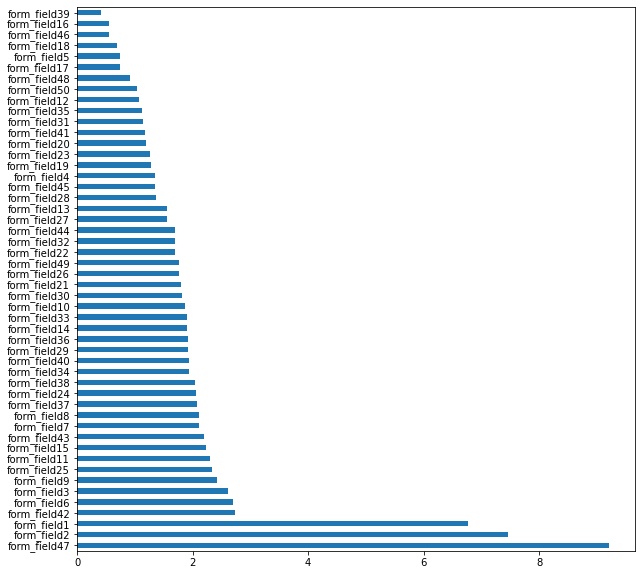

In [ ]:
plt.figure(figsize = (10,10))
feat_imp.nlargest(50).plot(kind= 'barh')

In [ ]:
X.drop('form_field39', axis = 1, inplace = True)
test.drop('form_field39', axis = 1, inplace = True)

In [ ]:
scores10 = []
scores11 = []
for fold,(tr_in,te_in) in enumerate(kf.split(X, y)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat4.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=100,verbose = 200,use_best_model=True)
    y_pred = cat4.predict(X_test)
    scores10.append(accuracy_score(y_test,y_pred))
    scores11.append(roc_auc_score(y_test,y_pred))

================================Fold0====================================
0:	test: 0.8072782	test1: 0.7821756	best: 0.7821756 (0)	total: 62.6ms	remaining: 5m 12s
200:	test: 0.8429309	test1: 0.8126232	best: 0.8126480 (197)	total: 12.7s	remaining: 5m 3s
400:	test: 0.8512761	test1: 0.8160451	best: 0.8160560 (396)	total: 24.8s	remaining: 4m 43s
600:	test: 0.8583740	test1: 0.8181868	best: 0.8182023 (599)	total: 37.2s	remaining: 4m 32s
800:	test: 0.8642650	test1: 0.8197542	best: 0.8197666 (799)	total: 49.7s	remaining: 4m 20s
1000:	test: 0.8699764	test1: 0.8207474	best: 0.8207691 (990)	total: 1m 2s	remaining: 4m 8s
1200:	test: 0.8754421	test1: 0.8215684	best: 0.8215854 (1199)	total: 1m 14s	remaining: 3m 56s
1400:	test: 0.8812183	test1: 0.8221410	best: 0.8222465 (1361)	total: 1m 27s	remaining: 3m 43s
1600:	test: 0.8864300	test1: 0.8228611	best: 0.8229216 (1588)	total: 1m 39s	remaining: 3m 31s
1800:	test: 0.8915228	test1: 0.8232506	best: 0.8233065 (1769)	total: 1m 51s	remaining: 3m 18s
2000:	te

In [ ]:
print(np.mean(scores10))
print(np.mean(scores11))

0.8097681703217519
0.6843677444985984


In [ ]:
pred1 = cat4.predict_proba(test)[:,1]

In [ ]:
lgbm = LGBMClassifier(boosting_type='gbdt', objective='binary', num_leaves=50,
                                learning_rate=0.01, n_estimators=2000, max_depth=8)

In [ ]:
scores20 = []
scores21 = []
for fold,(tr_in,te_in) in enumerate(kf.split(X, y)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    lgbm.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=100,verbose = 200)
    y_pred = lgbm.predict(X_test)
    scores20.append(accuracy_score(y_test,y_pred))
    scores21.append(roc_auc_score(y_test,y_pred))

================================Fold0====================================
Training until validation scores don't improve for 100 rounds.
[200]	training's binary_logloss: 0.405429	valid_1's binary_logloss: 0.430424
[400]	training's binary_logloss: 0.379488	valid_1's binary_logloss: 0.42012
[600]	training's binary_logloss: 0.363926	valid_1's binary_logloss: 0.417901
[800]	training's binary_logloss: 0.351803	valid_1's binary_logloss: 0.41698
Early stopping, best iteration is:
[842]	training's binary_logloss: 0.349453	valid_1's binary_logloss: 0.416783
================================Fold1====================================
Training until validation scores don't improve for 100 rounds.
[200]	training's binary_logloss: 0.405402	valid_1's binary_logloss: 0.425451
[400]	training's binary_logloss: 0.379684	valid_1's binary_logloss: 0.413183
[600]	training's binary_logloss: 0.364359	valid_1's binary_logloss: 0.409966
[800]	training's binary_logloss: 0.352324	valid_1's binary_logloss: 0.408882


In [ ]:
print(np.mean(scores20))
print(np.mean(scores21))

0.8081785714285715
0.6853363349877205


In [ ]:
pred2 = lgbm.predict_proba(test)[:,1]

In [ ]:
submit['2'] = pred2
submit['4'] = pred4
submit['1'] = pred1

In [ ]:
submit['default_status'] = ((submit['2']* 0.2)+ ((submit['4'] * 0.7)+ submit['1'] * 0.3)*0.8)

In [ ]:
submit.drop(['2', '4', '1'], axis =1, inplace = True)

In [ ]:
submit.to_csv('submit2d5c.csv', index = False)